# Лабораторная 4 - Классификация в sklearn + метрики классификации


### Каткова Полина


Ссылка https://www.kaggle.com/uciml/student-alcohol-consumption

Датасет по детской алкогольной зависимости

school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

sex - student's sex (binary: 'F' - female or 'M' - male)

age - student's age (numeric: from 15 to 22)

address - student's home address type (binary: 'U' - urban or 'R' - rural)

famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)

Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

guardian - student's guardian (nominal: 'mother', 'father' or 'other')

traveltime - home to school travel time (numeric: 1 - 1 hour)

studytime - weekly study time (numeric: 1 - 10 hours)

failures - number of past class failures (numeric: n if 1<=n<3, else 4)

schoolsup - extra educational support (binary: yes or no)

famsup - family educational support (binary: yes or no)

paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

activities - extra-curricular activities (binary: yes or no)

nursery - attended nursery school (binary: yes or no)

higher - wants to take higher education (binary: yes or no)

internet - Internet access at home (binary: yes or no)

romantic - with a romantic relationship (binary: yes or no)

famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

freetime - free time after school (numeric: from 1 - very low to 5 - very high)

goout - going out with friends (numeric: from 1 - very low to 5 - very high)

Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

health - current health status (numeric: from 1 - very bad to 5 - very good)

absences - number of school absences (numeric: from 0 to 93)

G1 - first period grade (numeric: from 0 to 20)

G2 - second period grade (numeric: from 0 to 20)

G3 - final grade (numeric: from 0 to 20, output target)

In [1]:
import pandas as pd
import numpy as np
import sklearn, sklearn.model_selection, sklearn.neighbors, sklearn.svm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#считывем данные
df = pd.read_csv('student-mat.csv')

In [4]:
# выводим первые 5 записей
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### 1.1 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма. Оценить accuracy.

In [5]:
# Выбираем исходные и целевые колонки 
# Будем классифицировать количество употребления алкоголя в буднии в зависимости от кол-ва употребления алкоголя на выходных, времени обучения, 
# плохих результатов в школе и доп занятий
df= df.dropna()
df.activities = pd.factorize(df.activities)[0]
X = df[['studytime', 'Walc' ,'failures', 'activities']]
print(X.shape[1])
y = df['Dalc']

4


In [6]:
# делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X , y, random_state = 99
)

In [7]:
# выводим размерности полученных массивов
print("форма массива X_train: {}".format(X_train.shape))
print("форма массива y_train: {}".format(y_train.shape))
print("форма массива X_test: {}".format(X_test.shape))
print("форма массива y_test: {}".format(y_test.shape))

форма массива X_train: (296, 4)
форма массива y_train: (296,)
форма массива X_test: (99, 4)
форма массива y_test: (99,)


In [8]:
# создаем модель knn с n_neighbors 35 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 50 )
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [9]:
# строим модель на обучающем наборе
knn.fit( np.array(X_train).reshape(-1, X.shape[1]), np.array(y_train).reshape(-1,1) )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

In [10]:
# классифицируем на тестовой выборке
y_pred = (knn.predict(np.array(X_test).reshape(-1, X.shape[1])))
print("Прогнозы для тестового набора:", y_pred, sep = '\n')

Прогнозы для тестового набора:
[1 1 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 3 1 1 1 1 1 1 3 1 1 1 1 1 1 1 2
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1
 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1]


In [11]:
# выводим accuracy
sklearn.metrics.accuracy_score( y_pred, y_test )

0.7575757575757576

Попробовать также вариант с предварительной нормализацией признаков. Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [12]:
# получаем объект для нормализации
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
# значения studytime до нормализации
df.studytime

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [14]:
# нормализуем значения studytime
norm=df.studytime
scaler.fit(np.array(norm).reshape(-1,1))
norm2 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [15]:
# нормализуем значения Walc
norm=df.Walc
scaler.fit(np.array(norm).reshape(-1,1))
norm1 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [16]:
# нормализуем значения failures
norm=df.failures
scaler.fit(np.array(norm).reshape(-1,1))
norm3 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [17]:
# нормализуем значения activities
norm=df.activities
scaler.fit(np.array(norm).reshape(-1,1))
norm4 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [18]:
df.studytime = norm2
df.Walc = norm1
df.failures = norm3
df.activities = norm4
df.studytime
# нормализованные значения  studytime

0     -0.042286
1     -0.042286
2     -0.042286
3      1.150779
4     -0.042286
         ...   
390   -0.042286
391   -1.235351
392   -1.235351
393   -1.235351
394   -1.235351
Name: studytime, Length: 395, dtype: float64

In [19]:
# еще раз выбираем исходные и целевые колонки 
X = df[['studytime', 'Walc' ,'failures', 'activities']]
y = df['Dalc']

In [20]:
# делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X , y, random_state = 99
)

In [21]:
# создаем модель knn с n_neighbors 35 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 35 )
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [22]:
# строим модель на обучающем наборе
knn.fit( np.array(X_train).reshape(-1,X.shape[1]), np.array(y_train).reshape(-1,1) )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=35, p=2,
                     weights='uniform')

In [23]:
# Выводим accuracy. Метрика не изменилась в результате нормализации
sklearn.metrics.accuracy_score( y_pred, y_test )

0.7575757575757576

### 1.2 На любом датасете продемонстрировать многоклассовую классификацию с помощью ЛЮБОГО алгоритма  с использованием кросс-валидации. Оценить accuracy.

In [24]:
# создадим классификатор kNN (n=35)
clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 35 )

In [25]:
#получим метрики на кросс-валидации
scores = sklearn.model_selection.cross_val_score( clf, (np.array(X).reshape(-1,X.shape[1])), (np.array(y).reshape(-1,1)), cv = 3 )

In [26]:
"Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean())

'Средняя правильность перекрестной проверки: 0.71'

In [27]:
# создадим объект для стратифицированной КВ с 5 фолдами
cvgen = sklearn.model_selection.StratifiedKFold(5)

# натравим кросс-валидацию
scores = sklearn.model_selection.cross_val_score(
    clf, (np.array(X).reshape(-1,X.shape[1])), (np.array(y).reshape(-1,1)), cv = cvgen
)
"Средняя правильность перекрестной проверки: {:.2f}".format(scores.mean())
# Значение accuracy стало меньше

'Средняя правильность перекрестной проверки: 0.70'

### 1.3. Поиграться с гиперпараметром, связанным со сложностью модели (в случае kNN — k_neighbours) и построить график accuracy для train set и test_set для разных значений гиперпараметра 

In [28]:
import matplotlib.pyplot as plt

# Построим график "Правильности" для разного числа соседей
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, stratify = y
)
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 150 с шагом 2
neighbors_settings = range(1,  151, 2)
for n_neighbors in neighbors_settings:
  # строим модель
  clf = sklearn.neighbors.KNeighborsClassifier( n_neighbors = n_neighbors )
  clf.fit(np.array(X_train).reshape(-1, X.shape[1]), np.array(y_train).reshape(-1,1) )
  # записываем правильность на обучающем наборе
  training_accuracy.append( clf.score(np.array(X_train).reshape(-1, X.shape[1]), np.array(y_train).reshape(-1,1) ) )
  # записываем правильность на тестовом наборе
  test_accuracy.append( clf.score(np.array(X_test).reshape(-1, X.shape[1]), np.array(y_test).reshape(-1,1) ) )


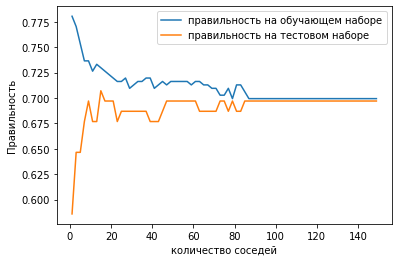

In [29]:

plt.plot( neighbors_settings, training_accuracy, label="правильность на обучающем наборе" )
plt.plot( neighbors_settings, test_accuracy, label="правильность на тестовом наборе" )
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
g = plt.legend()
#наилучшая точность при 17 соседях, после 87 правильность не изменяется

### 1.4. Построить confusion matrix 

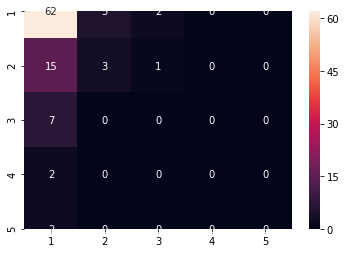

In [30]:
import seaborn as sns
columns = ['1', '2', '3', '4', '5']
confusion_scores = sklearn.metrics.confusion_matrix(y_test, y_pred)
confusion_df = pd.DataFrame(confusion_scores, columns = columns, index = columns)
sns.heatmap(confusion_df, annot = True)

### 2. Бинарная классификация. На любом (но уже другом, бинарном) датасете продемонстрировать бинарную классификацию (можно использовать любой алгоритм), посчитать метрики: accuracy, precision, recall, f-measure, а также составить classification_report

In [31]:
#выводим первые 5 строк
df2 = pd.read_csv('student-mat.csv')
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [32]:
# преобразоваем значения столбца higher в числовые
df2.higher = pd.factorize(df2.higher)[0]
#выбираем x и у
# будем определять хочет ли ученик поступать в высшую школу в зависимости от absences и studytime
X = df2[['absences','studytime']]
y = df2['higher']

In [33]:
# делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X , y, random_state = 99
)

In [34]:
# создаем модель knn с 1 соседом
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors =1)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
# строим модель на обучающем наборе
knn.fit( np.array(X_train).reshape(-1,X.shape[1]), np.array(y_train).reshape(-1,1) )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [36]:
#получаем результат на тестовой выборке
y_pred = (knn.predict(np.array(X_test).reshape(-1,X.shape[1])))

In [37]:
#выводим accuracy
sklearn.metrics.accuracy_score( y_pred, y_test )

0.898989898989899

In [38]:
# получаем значения accuracy, precision, recall, f measure
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)

In [39]:
# выводим значения accuracy, precision, recall, f measure
print(accuracy, precision, recall, f1)

0.898989898989899 0.16666666666666666 0.16666666666666666 0.16666666666666666


In [40]:
#результат предсказания
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [41]:
# выводим classification_report
print( sklearn.metrics.classification_report(
    y_test, y_pred, target_names=["yes", "no"]
) )

              precision    recall  f1-score   support

         yes       0.95      0.95      0.95        93
          no       0.17      0.17      0.17         6

    accuracy                           0.90        99
   macro avg       0.56      0.56      0.56        99
weighted avg       0.90      0.90      0.90        99



Попробовать также вариант с предварительной нормализацией признаков. Оценить метрики качества в случае с нормализованными признаками и ненормализованными.

In [42]:
# значения до нормализации
df2.absences

0       6
1       4
2      10
3       2
4       4
       ..
390    11
391     3
392     3
393     0
394     5
Name: absences, Length: 395, dtype: int64

In [43]:
# нормализуем значения absences
norm=df2.absences
scaler.fit(np.array(norm).reshape(-1,1))
norm2 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [44]:
# нормализуем значения studytime
norm=df2.studytime
scaler.fit(np.array(norm).reshape(-1,1))
norm3 = (scaler.transform(np.array(norm).reshape(-1,1)))

In [45]:
# нормализованные значения absences
df2.absences = norm2
df2.studytime = norm3
df2.absences

0      0.036424
1     -0.213796
2      0.536865
3     -0.464016
4     -0.213796
         ...   
390    0.661975
391   -0.338906
392   -0.338906
393   -0.714236
394   -0.088686
Name: absences, Length: 395, dtype: float64

In [46]:
#еще раз выбираем х и у
X = df2[['absences','studytime']]
y = df2['higher']

In [47]:
# делим данные на тестовые и обучающие 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
   X , y, random_state = 99
)

In [48]:
# создаем модель knn с 1 соседом
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier( n_neighbors = 1 )
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [49]:
# строим модель на обучающем наборе
knn.fit( np.array(X_train).reshape(-1,X.shape[1]), np.array(y_train).reshape(-1,1) )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [50]:
#получаем результат на тестовой выборке
y_pred = (knn.predict(np.array(X_test).reshape(-1,X.shape[1])))

In [51]:
#выводим accuracy
# точность после нормализации не изменилась
sklearn.metrics.accuracy_score( y_pred, y_test )

0.8282828282828283

In [52]:
# получаем значения accuracy, precision, recall, f measure
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
precision = sklearn.metrics.precision_score(y_test, y_pred)
recall = sklearn.metrics.recall_score(y_test, y_pred)
f1 = sklearn.metrics.f1_score(y_test, y_pred)
# выводим значения accuracy, precision, recall, f measure
print(accuracy, precision, recall, f1)
# значения метрик стали меньше

0.8282828282828283 0.0 0.0 0.0


In [53]:
# выводим classification_report
# не изменился после нормализации
print( sklearn.metrics.classification_report(
    y_test, y_pred, target_names=["yes", "no"]
) )

              precision    recall  f1-score   support

         yes       0.93      0.88      0.91        93
          no       0.00      0.00      0.00         6

    accuracy                           0.83        99
   macro avg       0.47      0.44      0.45        99
weighted avg       0.88      0.83      0.85        99

